In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, RMSprop

In [2]:
fldr='./dataset'

In [3]:
import os
flies=os.listdir(fldr)

In [4]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total= fldr+'/'+fle
    print (total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./dataset/100_0_0_20170112213500903.jpg.chip.jpg
./dataset/100_0_0_20170112215240346.jpg.chip.jpg
./dataset/100_1_0_20170110183726390.jpg.chip.jpg
./dataset/100_1_0_20170112213001988.jpg.chip.jpg
./dataset/100_1_0_20170112213303693.jpg.chip.jpg
./dataset/100_1_0_20170112215032192.jpg.chip.jpg
./dataset/100_1_0_20170117195420803.jpg.chip.jpg
./dataset/100_1_0_20170119212053665.jpg.chip.jpg
./dataset/100_1_2_20170105174847679.jpg.chip.jpg
./dataset/100_1_2_20170112213615815.jpg.chip.jpg
./dataset/100_1_2_20170112222336458.jpg.chip.jpg
./dataset/101_0_0_20170112213500903.jpg.chip.jpg
./dataset/101_1_2_20170105174739309.jpg.chip.jpg
./dataset/103_0_2_20170112213001988.jpg.chip.jpg
./dataset/105_0_0_20170112213001988.jpg.chip.jpg
./dataset/105_1_0_20170112213001988.jpg.chip.jpg
./dataset/105_1_0_20170112213021902.jpg.chip.jpg
./dataset/105_1_0_20170112213507183.jpg.chip.jpg
./dataset/105_1_1_20170112213303693.jpg.chip.jpg
./dataset/10_0_0_20161220222308131.jpg.chip.jpg
./dataset/10_0_0_2017

In [5]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

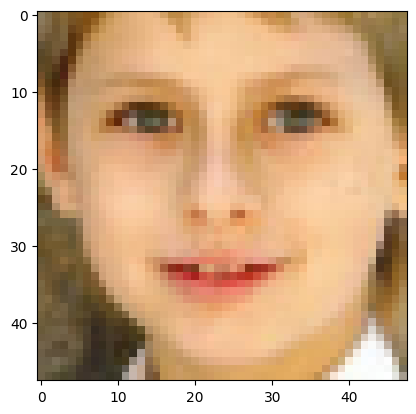

In [6]:
plt.imshow(images[77])

In [7]:
print(ages[77])

10


In [8]:
print(genders[77])

0


In [9]:
images_f =np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy', genders_f)

In [11]:
values, counts=np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


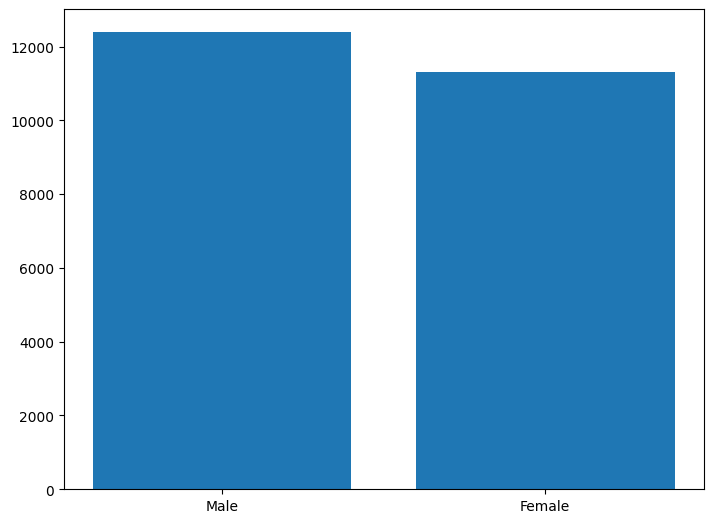

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male', 'Female']
values=[12391 , 11317]
ax.bar(gender, values)
plt.show()

In [13]:
values, counts=np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [14]:
val=values.tolist()
cnt=counts.tolist()

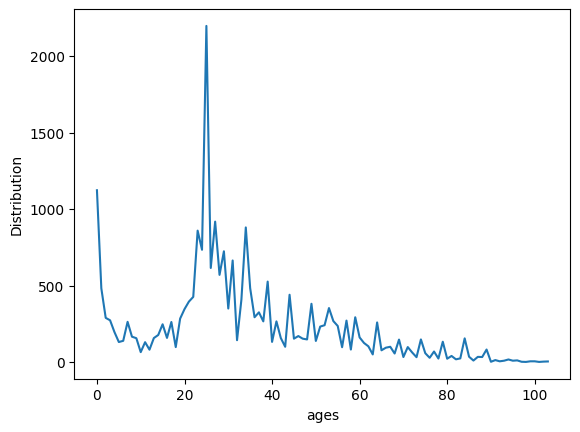

In [15]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('Distribution')
plt.show()

In [16]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [17]:
images_f_2=images_f/255

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
labels_f=np.array(labels)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(images_f_2,labels_f,test_size=0.25)

In [22]:
Y_train[0:5]

array([[70,  0],
       [30,  0],
       [38,  0],
       [35,  1],
       [22,  1]])

In [23]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [24]:
Y_train_2[0][0:5]

array([0, 0, 0, 1, 1])

In [25]:
Y_train_2[1][0:5]

array([70, 30, 38, 35, 22])

In [26]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding='same',strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [27]:
def model(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)  # Ensure this line is added to define maxp_4
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    dense_2 = Dense(64, activation='relu')(drop_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_2)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="adam", metrics=["accuracy","accuracy"])
    return model

In [28]:
Model=model((48,48,3))

In [29]:
Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 32)        │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 48, 48, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 48, 48, 32)        │               0 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 32)        │               0 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 24, 24, 64)        │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 24, 24, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 24, 24, 64)        │               0 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 12, 12, 64)        │               0 │ activation_1[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 12, 12, 128)       │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 12, 12, 128)       │               0 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 6, 6, 128)         │               0 │ activation_2[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 6, 6, 256)         │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 6, 6, 256)         │               0 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 6, 6, 256)         │               0 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 540,226 (2.06 MB)

 Trainable params: 540,226 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss', restore_best_weights=True)
callback_list=[checkpoint, Early_stop]
Model.save('Age_Sex_Detection.h5')

In [32]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - age_out_accuracy: 0.0439 - loss: 19.9107 - sex_out_accuracy: 0.5036
Epoch 1: val_loss improved from inf to 19.14990, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - age_out_accuracy: 0.0440 - loss: 19.9033 - sex_out_accuracy: 0.5036 - val_age_out_accuracy: 0.0493 - val_loss: 19.1499 - val_sex_out_accuracy: 0.4697
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - age_out_accuracy: 0.0483 - loss: 15.7569 - sex_out_accuracy: 0.5224
Epoch 2: val_loss improved from 19.14990 to 14.47433, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 28s 102ms/step - age_out_accuracy: 0.0483 - loss: 15.7539 - sex_out_accuracy: 0.5224 - val_age_out_accuracy: 0.0493 - val_loss: 14.4743 - val_sex_out_accuracy: 0.6087
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - age_out_accuracy: 0.0439 - loss: 12.4413 - sex_out_accuracy: 0.5669
Epoch 3: val_loss improved from 14.47433 to 13.18914, 

In [33]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - age_out_accuracy: 0.0492 - loss: 7.9459 - sex_out_accuracy: 0.8772


[8.037623405456543, 0.04926607012748718, 0.8771722912788391]

In [34]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


In [35]:
pred[1]

array([[ 2.3536072],
       [18.022268 ],
       [27.930607 ],
       ...,
       [24.663626 ],
       [ 5.4029617],
       [39.973145 ]], dtype=float32)

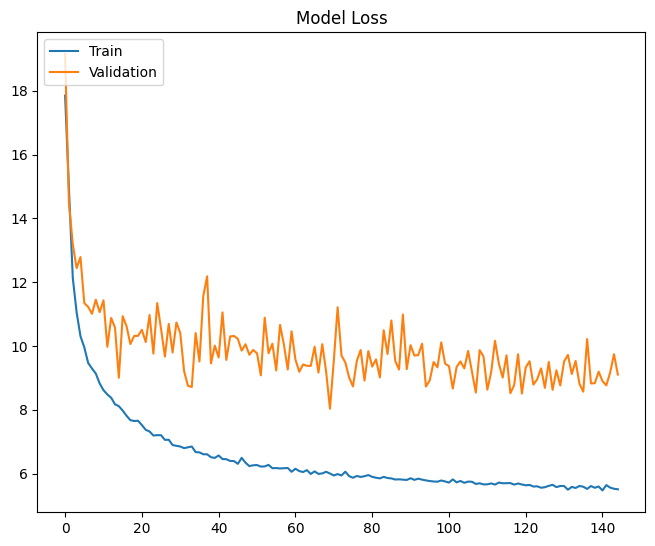

In [36]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

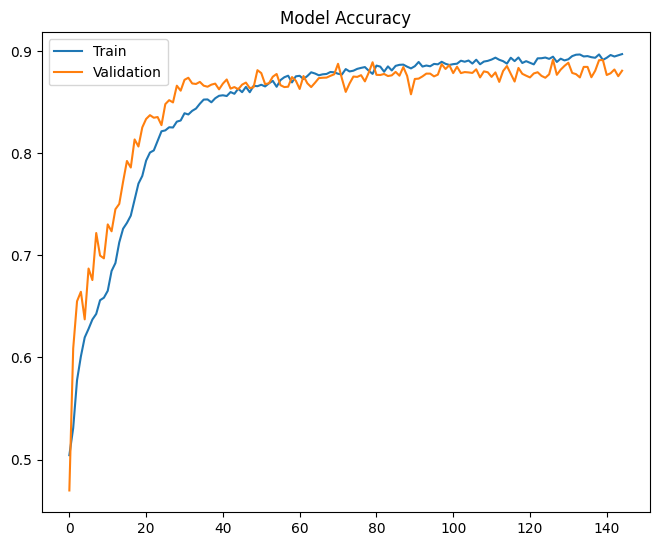

In [37]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

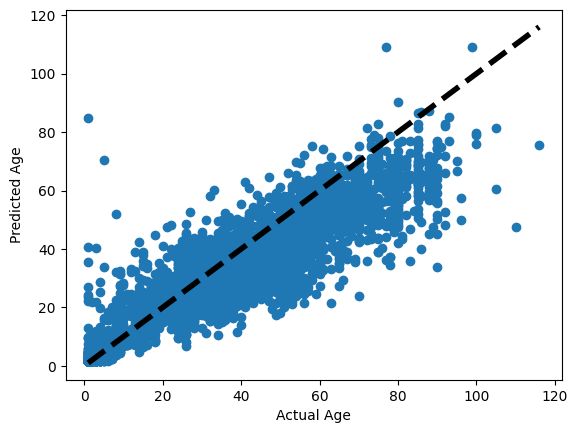

In [38]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [39]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
report=classification_report(Y_test_2[0],Pred_l)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3143
           1       0.85      0.90      0.87      2784

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



In [43]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

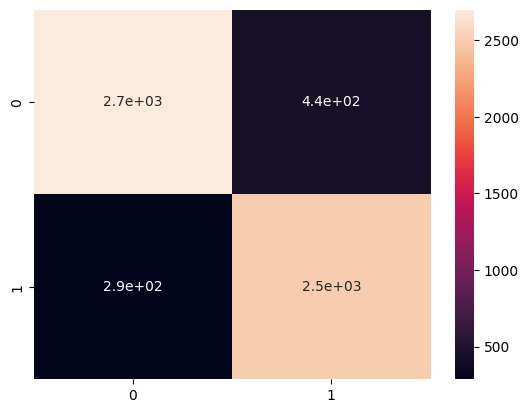

In [44]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [45]:
def test_image(ind, images_f, images_f_2, Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    Pred_1 = Model.predict(np.array([image_test]))
    print(Pred_1)
    sex_f = ['Male', 'Female']
    age = int(np.round(Pred_1[1][0])) 
    sex = int(np.round(Pred_1[0][0])) 
    print("Predicted Age is:" + str(age))
    print("Predicted Gender is:" + sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[array([[0.99525505]], dtype=float32), array([[86.37305]], dtype=float32)]
Predicted Age is:86
Predicted Gender is:Female


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\1228194823.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(Pred_1[1][0]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\1228194823.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(Pred_1[0][0]))


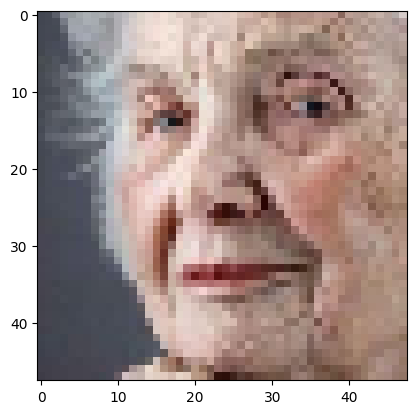

In [46]:
test_image(4, images_f, images_f_2, Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[array([[0.1754246]], dtype=float32), array([[10.116809]], dtype=float32)]
Predicted Age is:10
Predicted Gender is:Male


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\1228194823.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(Pred_1[1][0]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\1228194823.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(Pred_1[0][0]))


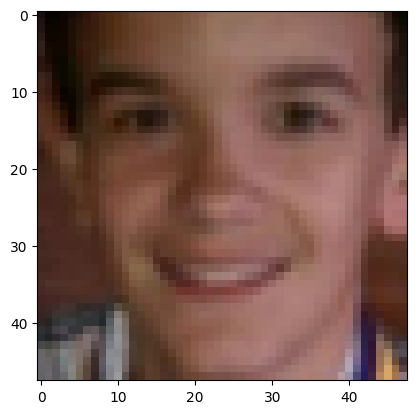

In [47]:
test_image(23,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[array([[0.79955345]], dtype=float32), array([[9.343558]], dtype=float32)]
Predicted Age is:9
Predicted Gender is:Female


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\1228194823.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(Pred_1[1][0]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\1228194823.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(Pred_1[0][0]))


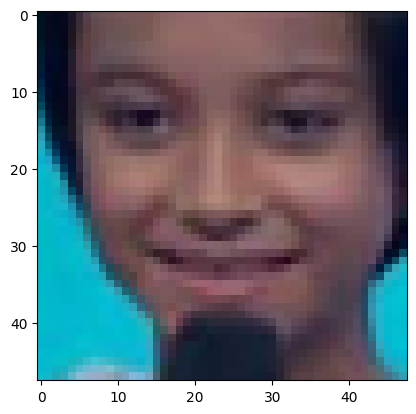

In [48]:
test_image(168,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[array([[0.09065598]], dtype=float32), array([[21.294018]], dtype=float32)]
Predicted Age is:21
Predicted Gender is:Male


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\1228194823.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(Pred_1[1][0]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\1228194823.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(Pred_1[0][0]))


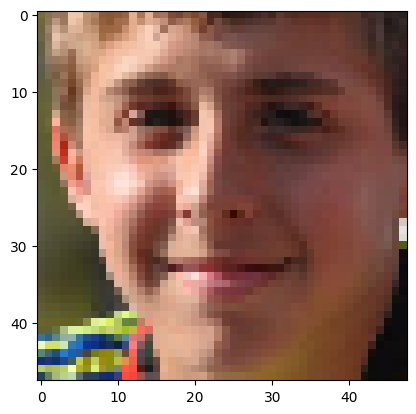

In [49]:
test_image(888,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[array([[0.9859006]], dtype=float32), array([[25.331127]], dtype=float32)]
Predicted Age is:25
Predicted Gender is:Female


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\1228194823.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(Pred_1[1][0]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8372\1228194823.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(Pred_1[0][0]))


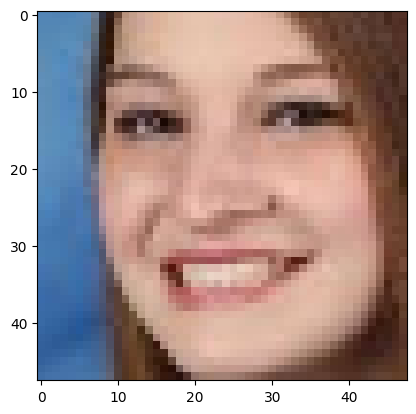

In [50]:
test_image(1288,images_f,images_f_2,Model)